<a href="https://colab.research.google.com/github/satuelisa/CINVESTAV2025/blob/main/best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

*Optimal* means "cannot be improved upon". It does not mean that the solution is the best possible, though. The best possible solution, assuming there is only one, would be referred to as the **optimum**, though often it is possible that multiple equally-good best solutions exist in which case we use the plural **optima** to refer to that set of solutions.

An optimum is *always* optimal, but an optimal solution is **not** always an optimum. As an example, take the *matching* problem.

![](https://www.researchgate.net/profile/Mustafa-Kemal-Tural/publication/338234856/figure/fig1/AS:853099916836868@1580406278650/Examples-of-maximal-matchings.png)

Optimization is the (mathematical) process of constructing a solution to a problem that is feasible (meaning that is respects all the *restrictions* set for the solution) and also an optimum (yields the best possible value for an *objective*). The restrictions and the objectives are expressed in terms of a set of *varibles* that can be controlled and *constants* that need to be measured (or at least estimated) to formulate a specific *instance* of that problem.

If we have multiple objective functions, it is a *multi-objective* optimization problem and the solutions that are optima in terms of one of the objectives may not be so in terms of another one.

If the variables all take on real values and the restrictions and objectives are all *linear* functions, then we are facing a linear-programming problem for which efficient **exact** solutions are possible.

If the variables are all **integers**, then the problem can be approached as an *integer-programming* probem and is often referred to as a *combinatorial* optimization problem (these tend to deal with picking and configuring elements from a set of options). These can be very time consuming or impossible to solve exactly.


Let's start with an easy-to-solve [linear programming](https://realpython.com/linear-programming-python/) scenario:

![](https://realpython.com/cdn-cgi/image/width=480,format=auto/https://files.realpython.com/media/lp-py-eq-3.65b2e6d529bc.png)

In [1]:
# https://realpython.com/linear-programming-python/ is the tutorial at which the example and the code originate

from scipy.optimize import linprog # load a library

In [2]:
b = [ (0, float("inf")), (0, float("inf")) ] # x & y both need to be positive (these are their lower and upper bounds)

In [3]:
# represent the set of equations above

# variable order [ x, y ]

obj = [ -1, -2 ] # objective function (to minimize)
ineqM = [[ 2,  1 ],  [ -4,  5 ],  [ 1, -2 ] ] # multipliers of left sides of inequalities
eqM = [[ -1, 5 ]] # multipliers of the left side of the equality constraint
ineqC = [20, 10, 2] # constants om the right side of the inequalities
eqC = [ 15 ] # constant on the right side of the equality

In [4]:
solution = linprog(c = obj, A_ub = ineqM, b_ub = ineqC, A_eq = eqM, b_eq = eqC, bounds = b, method = 'revised simplex') # use a variant of the classical simplex algorithm to find an optimum
solution # let's see it

/tmp/ipython-input-4-1011808304.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(c = obj, A_ub = ineqM, b_ub = ineqC, A_eq = eqM, b_eq = eqC, bounds = b, method = 'revised simplex') # use a variant of the classical simplex algorithm to find an optimum


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.818181818181817
       x: [ 7.727e+00  4.545e+00]
     nit: 3

Now, let's try [integer programming](https://towardsdatascience.com/integer-programming-in-python-1cbdfa240df2/) with the classical knapsack problem (for which we actually also know a reasonably quick exact algorithm without needing to resort to integer programming, but since it is easy to understand as a problem, it makes a pleasant example to work with).

In [5]:
# example from the tutorial at https://towardsdatascience.com/integer-programming-in-python-1cbdfa240df2/

import cvxpy # library for convex integer programming
import numpy as np

# we have a list of items for which we know how much each one weighs
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82]) # note that these are conveniently in increasing order

# we also know the value (worth / price / utility) of each item
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

# we need to travel / escape / evacuate but we cannot take EVERYTHING with us
capacity = 165 # how much total weight are we able to transport

The problem is picking the subset of items that respects that total capacity and *maximizes* the total utility of the included items.

In [6]:
count = len(weights)

assert count == len(utilities)

totalWeight = sum(weights)

if totalWeight <= capacity:
  print('No worries, you can take everything!')
else: # we have to choose
  pick = cvxpy.Variable(count, boolean = True) # true/false variables for which we set values to pick a subset of the items
  restriction = weights * pick <= capacity # the total weight has to stay below or at capacity
  value = utilities * pick # this is our objective

  knapsack = cvxpy.Problem(cvxpy.Maximize(value), [ restriction ]) # set the stage for what is to be solved
  knapsack.solve(solver = cvxpy.GLPK_MI) # have the library's solver find an optimum
  chosen = pick.value # which items need to be taken
  print(chosen)

  optValue = sum(utilities * chosen)
  carryWeight = sum(weights * chosen)

  print(f'Optimum {optValue} with total weight {carryWeight}')

[1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
Optimum 309.0 with total weight 165.0


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


We get some printouts warning us about how the `cvxpy` library is using mechanisms that are no longer be supported. Let's run that other known method for solving this problem so that we can see if the result is still reliable.

In [7]:
if totalWeight < capacity:
    print('Still good')
else:
    V = dict() # we essentially populate a table in a fashion that is known as dynamic programming
    for w in range(capacity + 1):
        V[(w, 0)] = 0 # it starts with all zeroes
    for i in range(count): # we consider the items one at a time
        weight = weights[i]
        value = utilities[i]
        for w in range(capacity + 1):
            candidate = V.get((w - weight, i), -float('inf')) + value # total value if we added this item
            V[(w, i + 1)] = max(V[(w, i)], candidate) # pick the higher of the options of adding it versus not adding it
    bestValue = max(V.values())
    weightBest = max(V.keys(), key = (lambda k: V[k]))[0]
    print(f'Optimum {bestValue} (vs. {optValue}) with total weight {weightBest} (vs. {carryWeight})')

Optimum 309 (vs. 309.0) with total weight 165 (vs. 165.0)


Coherent. Nice.

Which of your research questions involve linear or integer-programming like scenarios? When it is a bit of both, we call those "mixed-integer programming" problems in math-nerd jargon.

## Second part: going rogue

When exact solutions are not possible to obtain within reasonable time and resources, there are still good options:

(1) *Approximation* algorithms (doing a precise, well-defined thing that is fast, will not necessarily lead to an optimum, but we have a theoretical bound to how far from optimum we can land as a worst-case scenario, whether deterministically or probablistically).

(2) *Heuristic* methods (doing something that is often build upon on multiple probabilistic elements *without* having a guaranteed bound on how far from optimum we may end up being, but with a reason to believe that the solution would "usually" be somewhat good and we would construct it somewhat quickly.

For **approximation**, we have two classical examples. The first one is rather straightforward though inherently *probabilistic*, whereas the second one is a bit elaborate but can be kept *deterministic*.

The straightforward one is the problem of finding a minimum cut in a graph: split the graph into two parts in such a way that the number of edges crossing from one part to the other is as small as possible. This is a hard problem to solve exactly through combinatorial optimization, but we can iteratively *contract* edges of the graph until only one remains (this is called [Karger's algorithm](https://en.wikipedia.org/wiki/Karger%27s_algorithm)).

To understand it, we need a graph. For the above min-cut stuff to make sense, the graph has to be connected.

In [8]:
import networkx as nx

vc = 50 # vertex count
th = 0.05 # edge threshold

while True:
  graph = nx.random_geometric_graph(vc, th, dim = 2)
  if nx.is_connected(graph):
    break
  th += 0.01 # increase if disconnected

To understand this, we need to consider the positions of the vertices (also called nodes).

In [9]:
coords = nx.get_node_attributes(graph, 'pos')
list(coords.items())[:4]

[(0, [0.16890610333872103, 0.5987025249034146]),
 (1, [0.4451266661960145, 0.6570400696577715]),
 (2, [0.9911052312909818, 0.6921976503759274]),
 (3, [0.8999657963165681, 0.7227227694576289])]

Let's draw it.

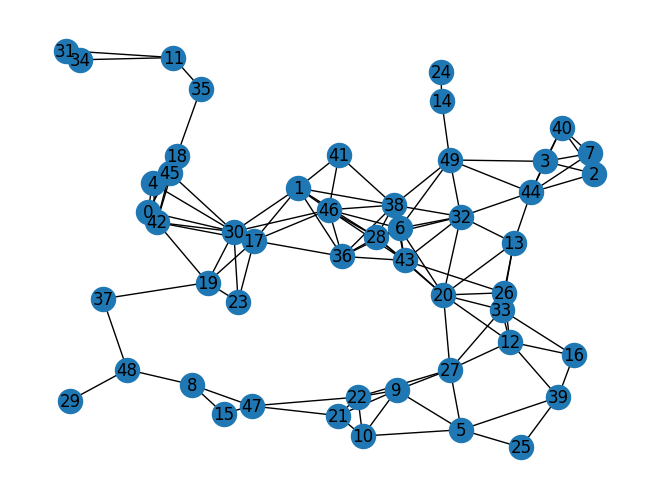

In [10]:
nx.draw(graph, pos = coords)
labels = nx.draw_networkx_labels(graph, pos = coords)

When we contract an edge, it means that we pull it to zero-length and merge the vertices that are its end points. Note that the remaining graph can now have **multiple** edges between two vertices; we will begin to track this as an integer edge weight since we need to keep track of it. (Think about *why* we need to keep track of it.)

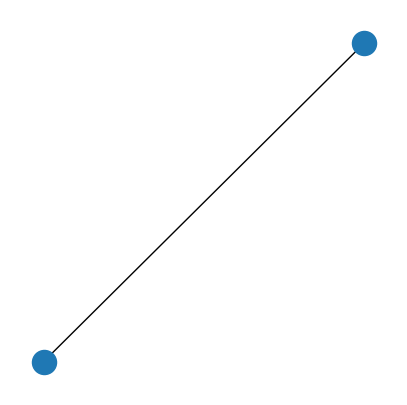

In [11]:
from random import choice
import matplotlib.pyplot as plt
import matplotlib.animation

from matplotlib import rc
rc('animation', html='jshtml')

G = graph.copy() # work on a copy so we can run this many times
pos = coords.copy()

fig, ax = plt.subplots(figsize = (5, 5))

def update(i):
  global G, pos
  ax.clear()
  if len(G.edges) > 1:
    chosen = choice(list(G.edges))
    s, t = chosen
    if str(s) > str(t): # ensure order
      s, t = t, s
    merged = f'{s}.{t}'
    G.add_node(merged)
    xs, ys = pos[s]
    xt, ys = pos[t]
    pos[merged] = ( (xs + xt) / 2, (ys + ys) / 2 ) # middle

    for v in chosen:
      for neighbor in G.neighbors(v):
        if not neighbor in chosen:
          added = (merged, neighbor)
          if G.has_edge(*added):
           G[merged][neighbor]['weight'] += 1
          else:
           G.add_edge(merged, neighbor, weight = 1)

    G.remove_node(s)
    G.remove_node(t)
  edgeWeights = [ G[u][v].get('weight', 1) for u, v in G.edges() ]
  nx.draw(G, pos = pos, width = edgeWeights, ax = ax)

matplotlib.animation.FuncAnimation(fig, update, frames = len(G.edges()) - 1, interval = 300, repeat = True)

In [12]:
last = list(G.edges())
last

[(41,
  '0.1.38.6.17.30.18.35.4.45.42.46.12.27.33.39.20.26.28.36.43.13.40.44.49.32.25.5.2.11.34.16.10.21.9.22.47.15.8.37.48.19.29.31.14.24.23.3.7')]

In [13]:
u, v = last[0]
G[u][v].get('weight', 1)

1

The second deterministic approximation approach is for the classical TSP (another graph problem). To solve it, we begin with a minimum spanning tree for a *complete* graph (which clearly is not a feasible solution since it is not even a cycle).


In [14]:
from math import sqrt

# same nodes, but now with completely connected edges ; edge costs are Euclidean distances
cg = nx.Graph()
for v in graph.nodes:
  for w in graph.nodes:
    if v < w:
      x1, y1 = coords[v]
      x2, y2 = coords[w]
      cg.add_edge(v, w, cost = sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))

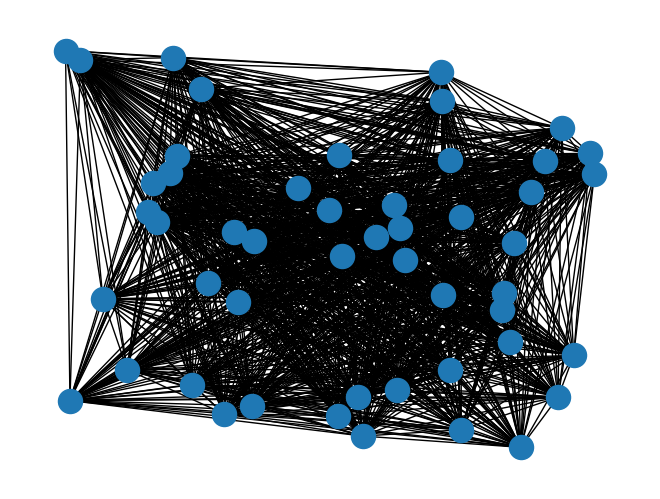

In [15]:
nx.draw(cg, pos = coords) # everything is connected to everything with a straight line

In [16]:
mst = nx.minimum_spanning_tree(cg, weight = 'cost', algorithm = "kruskal")
print(cg, 'vs', mst)

Graph with 50 nodes and 1225 edges vs Graph with 50 nodes and 49 edges


Let's see this spanning tree; it will connect everything to everything in a minimalistic fashion, with no redundant edges.

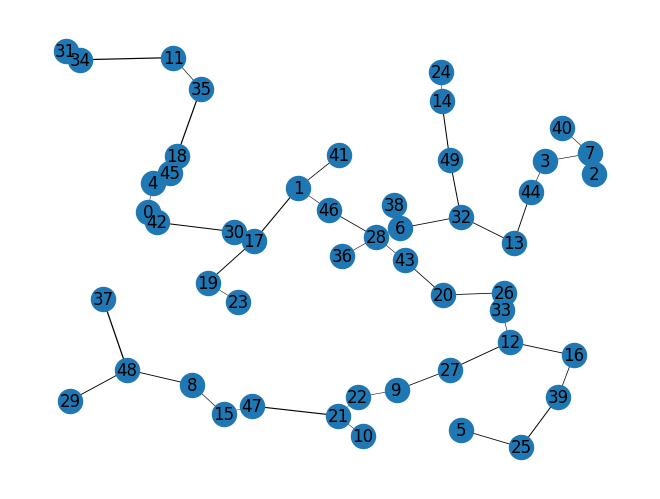

In [17]:
costs = [ 5 * cg[u][v].get('cost') for u, v in mst.edges() ] # thicker for visibility
nx.draw(mst, pos = coords, width = costs, edge_color = 'black')
labels = nx.draw_networkx_labels(cg, pos = coords)

Let's traverse the branches "back and forth" so it is a cycle and then "straighten out" by "skipping ahead" (we assume that the triangle inequality holds for the distances/costs).

In [18]:
bf = []
visited = set()

def dfs(v):
    global bf, visited
    bf.append(v)
    visited.add(v)
    cand = set(mst.neighbors(v)) - visited # unvisited
    for w in cand:
        dfs(w)
        bf.append(v)

dfs(0)

We have now created a sequence of visits along the MST that visits every place at least once.

In [19]:
print(bf[:5], bf[-5:]) # the MST back and forth traversal order

[0, 42, 30, 17, 1] [35, 18, 45, 4, 0]


The issue is that we go to some places rather often whereas in TSP we just want to go everyone once. We can fix this with ease since our original graph is a complete one and the edge weights, being Euclidean distances, respect the *triangle inquality*.

In [20]:
straightened = [ 0 ]
for cand in bf:
    if cand not in straightened: # skip ahead if already visited
        straightened.append(cand)
straightened.append(0) # close the loop

print(straightened[:5], straightened[-5:])

[0, 42, 30, 17, 1] [35, 11, 34, 31, 0]


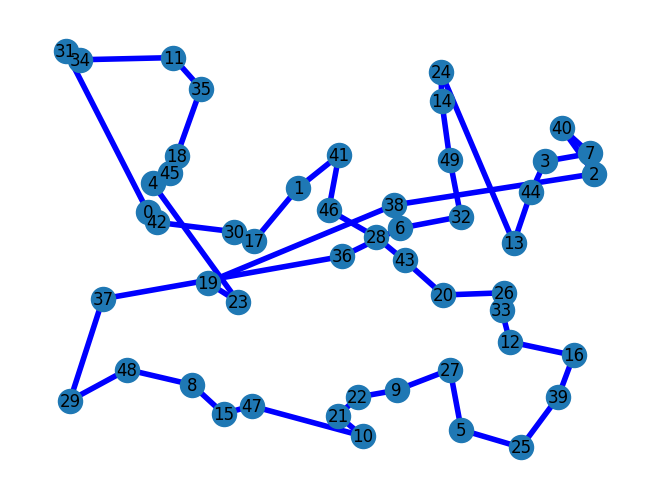

In [21]:
si = set() # which edges are on this straightened-out loop
for i in range(len(straightened) - 1):
  e = (straightened[i], straightened[i + 1])
  si.add(e)
  re = (e[1], e[0]) # reverse
  si.add(re)

costs = [ 4 if ((u, v) in si) else 0 for u, v in cg.edges() ] # hide the other edges
nx.draw(cg, pos = coords, width = costs, edge_color = 'blue')
labels = nx.draw_networkx_labels(cg, pos = coords)

Nothing says this is optimal, so we can most likely make *heuristic* improvements to it.

We will make use of **the 2-opt heuristic**: take two edges *(a, b)* and *(c, d)* along the route and then then switch it around going from *a* to *c*, then backwards the original route from *b* to *c* and then continue from *b* to *d*, after which the rest of the route is as before. The result is that the edges *(a, b)* and *(c, d)* were removed and in their place we now have the edges *(a, c)* and *(b, d)*, so if the sum of the costs of the former exceed that of the latter, we win a little.

In [22]:
from random import randint

def twoopt(r):
    n = len(r)
    f = randint(1, n - 2) # first cut
    s = randint(f + 1, n - 1) # second cut
    start = r[:f]
    middle = r[f:s] # to invert
    finish = r[s:]
    assert len(start) > 0 and len(middle) > 0 and len(finish) > 0
    return start + middle[::-1] + finish

Since the way we are thinking this requires the two edges to be in the middle of the route instead of at the end of the beginning, we can also just roll the route around since it is a cycle and it does not really matter where we start.

In [23]:
def roll(r):
    k = len(r)
    assert r[0] == r[-1]
    offset = randint(1, k - 2)
    assert offset < len(r)
    rolled = r[offset:-1] + r[:offset]
    return rolled + [ rolled[0] ] # close it back

def restore(r):
    if r[0] == 0:
        assert r[-1] == 0
        return r # nothing to do here
    assert r[0] == r[-1]
    zero = r.index(0)
    unrolled = r[zero:-1] + r[:zero] + [0]
    return unrolled

We will use **simulated annealing** that lets us move from the *current* solution to a worse one, so we must keep at all times a copy of the *best* solution we have seen thus far so that we never lose that upper bound of being no more than twice above the cost of the MST.

You can mess with the initial temperature `T`and the cooling schedule `eps` to alter the probability with which worse solutions are accepted. Changing the `maximum` affects the amount of iterations that the search is allow to "stall" without improvement.

In [24]:
from math import exp
from random import random

def totalcost(G, r):
    acc = 0 # accumulate the cost here
    p = 1 # by traversing the route
    while p < len(r):
        source = r[p - 1]
        target = r[p]
        d = G.get_edge_data(source, target)
        assert 'cost' in d
        acc += d['cost']
        p += 1
    return acc

def simAnn(G, current, stuck = 30, maximum = 1000, \
           T = 1000, cooling = 0.999, eps = 0.01):
    stalled = 0
    stable = 0
    cheapest = current.copy()
    lcost = ccost = totalcost(G, current)
    i = 0
    while stalled < maximum and T > eps:
        assert current[0] == current[-1] == 0
        assert len(current) == G.number_of_nodes() + 1
        modified = restore(twoopt(roll(current)))
        mcost = totalcost(G, modified)
        d = ccost - mcost
        if mcost < lcost: # a new low (a good thing here)
            print(f'New low at {mcost:.2f} on iteration {i} at temp {T:.2f}: {lcost:.2f}')
            cheapest = modified.copy()
            lcost = mcost
            if d > eps:
                stable += 1
                if stable > stuck:
                    stalled = maximum
                    continue
            else:
                stable = 0 # notable improvement
        threshold = exp(d / T) # probability
        i += 1
        if random() < threshold: # accept
            ccost = mcost
            current = modified
            if d > 0: # it was better
                T *= cooling # get stricter
                stalled = 0
                continue
        stalled += 1
    return cheapest

# start with a copy of the straightened-out route
assert straightened[0] == straightened[-1] == 0
cheapest = simAnn(cg, straightened.copy())

New low at 7.11 on iteration 33704 at temp 0.07: 7.13
New low at 7.11 on iteration 39751 at temp 0.06: 7.11
New low at 6.97 on iteration 39946 at temp 0.06: 7.11
New low at 6.94 on iteration 40635 at temp 0.06: 6.97
New low at 6.81 on iteration 40728 at temp 0.06: 6.94
New low at 6.79 on iteration 40742 at temp 0.06: 6.81
New low at 6.71 on iteration 40813 at temp 0.06: 6.79
New low at 6.61 on iteration 41632 at temp 0.06: 6.71
New low at 6.60 on iteration 42224 at temp 0.06: 6.61
New low at 6.57 on iteration 42259 at temp 0.06: 6.60
New low at 6.55 on iteration 42260 at temp 0.06: 6.57
New low at 6.54 on iteration 42395 at temp 0.06: 6.55
New low at 6.51 on iteration 42512 at temp 0.05: 6.54
New low at 6.51 on iteration 42519 at temp 0.05: 6.51
New low at 6.47 on iteration 42594 at temp 0.05: 6.51
New low at 6.39 on iteration 42631 at temp 0.05: 6.47
New low at 6.34 on iteration 59551 at temp 0.04: 6.39
New low at 6.34 on iteration 59552 at temp 0.04: 6.34
New low at 6.33 on iteration

It would be good to take a look at this improved route.

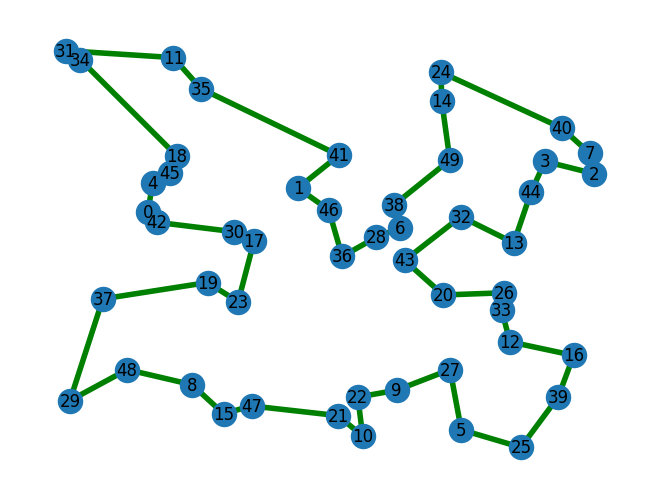

In [25]:
best = set()
for i in range(cg.number_of_nodes()):
  e = (cheapest[i], cheapest[i + 1])
  best.add(e)
  re = (e[1], e[0]) # reverse direction
  best.add(re)

costs = [ 4 if ((u, v) in best) else 0 for u, v in cg.edges() ] # hide the other edges
nx.draw(cg, pos = coords, width = costs, edge_color = 'green')
labels = nx.draw_networkx_labels(cg, pos = coords)

What does the out-of-the-box solution in `nx` look like?

In [26]:
c1 = totalcost(cg, cheapest)
tsp = nx.approximation.traveling_salesman_problem(cg, weight = 'cost')
c2 = totalcost(cg, tsp)
print(c1, c2)

5.698195063176093 6.422833567720612


Which one was better?